In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [2]:
daily_smoking = pd.read_csv("daily-smoking-prevalence-bounds.csv")
air_pollution = pd.read_csv("share-deaths-air-pollution.csv")
alcohol = pd.read_csv("total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv")

# Smoking EDA

In [3]:
ukraine_daily_smoking = daily_smoking[daily_smoking["Entity"] == "Ukraine"].copy()
sweden_daily_smoking = daily_smoking[daily_smoking["Entity"] == "Sweden"].copy()
alcohol_ukraine = alcohol[alcohol["Entity"] == "Ukraine"].copy()
alcohol_sweden = alcohol[alcohol["Entity"] == "Sweden"].copy()

In [4]:
ukraine_daily_smoking = ukraine_daily_smoking[ukraine_daily_smoking["Year"] >= 1990]
sweden_daily_smoking = sweden_daily_smoking[sweden_daily_smoking["Year"] >= 1990]
alcohol_ukraine = alcohol_ukraine[alcohol_ukraine["Year"] >= 1990]
alcohol_sweden = alcohol_sweden[alcohol_sweden["Year"] >= 1990]

In [5]:
ukraine_daily_smoking = ukraine_daily_smoking.set_index(pd.DatetimeIndex(pd.to_datetime(ukraine_daily_smoking["Year"], format="%Y")).to_period("Y")).drop(columns=["Year", "Code", "Entity"])

In [6]:
sweden_daily_smoking = sweden_daily_smoking.set_index(pd.DatetimeIndex(pd.to_datetime(sweden_daily_smoking["Year"], format="%Y")).to_period("Y")).drop(columns=["Year", "Code", "Entity"])

In [7]:
alcohol_ukraine = alcohol_ukraine.set_index(pd.DatetimeIndex(pd.to_datetime(alcohol_ukraine["Year"], format="%Y")).to_period("Y")).drop(columns=["Year", "Code", "Entity"])
alcohol_sweden = alcohol_sweden.set_index(pd.DatetimeIndex(pd.to_datetime(alcohol_sweden["Year"], format="%Y")).to_period("Y")).drop(columns=["Year", "Code", "Entity"])

In [8]:
ukraine_daily_smoking = ukraine_daily_smoking.rename(columns={"Daily smoking prevalence - both (IHME, GHDx (2012))": "Daily smoking pct"})

In [9]:
sweden_daily_smoking = sweden_daily_smoking.rename(columns={"Daily smoking prevalence - both (IHME, GHDx (2012))": "Daily smoking pct"})

<Axes: xlabel='Year'>

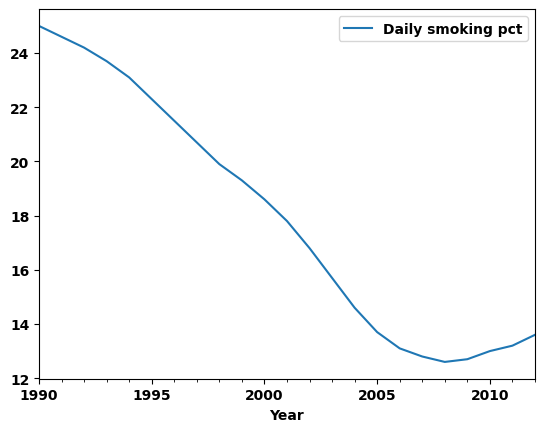

In [10]:
sweden_daily_smoking.plot()

<Axes: xlabel='Year'>

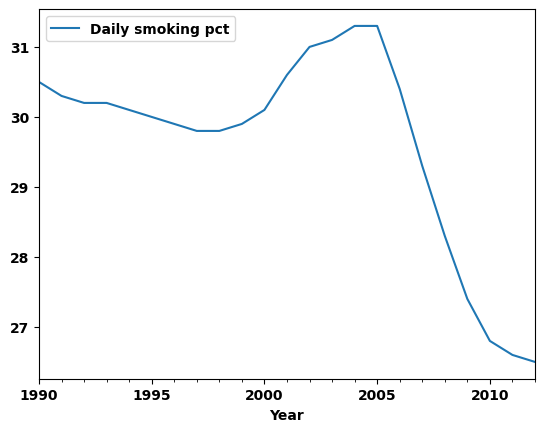

In [11]:
ukraine_daily_smoking.plot()

In [12]:
sweden_daily_smoking

,Daily smoking pct
Year,
1990,25.000000
1991,24.600000
1992,24.200001
1993,23.700001
1994,23.100000
1995,22.299999
1996,21.500000
1997,20.700001
1998,19.900000


In [13]:
years = sweden_daily_smoking.index.year

sweden_daily_smoking['Years_5'] = (years // 5) * 5
sweden_daily_smoking_agg = sweden_daily_smoking.groupby('Years_5').mean()  

ukraine_daily_smoking['Years_5'] = (years // 5) * 5
ukraine_daily_smoking_agg = ukraine_daily_smoking.groupby('Years_5').mean()   

In [14]:
sweden_daily_smoking_agg

,Daily smoking pct
Years_5,
1990,24.120000
1995,20.740000
2000,16.700000
2005,12.980000
2010,13.266667


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

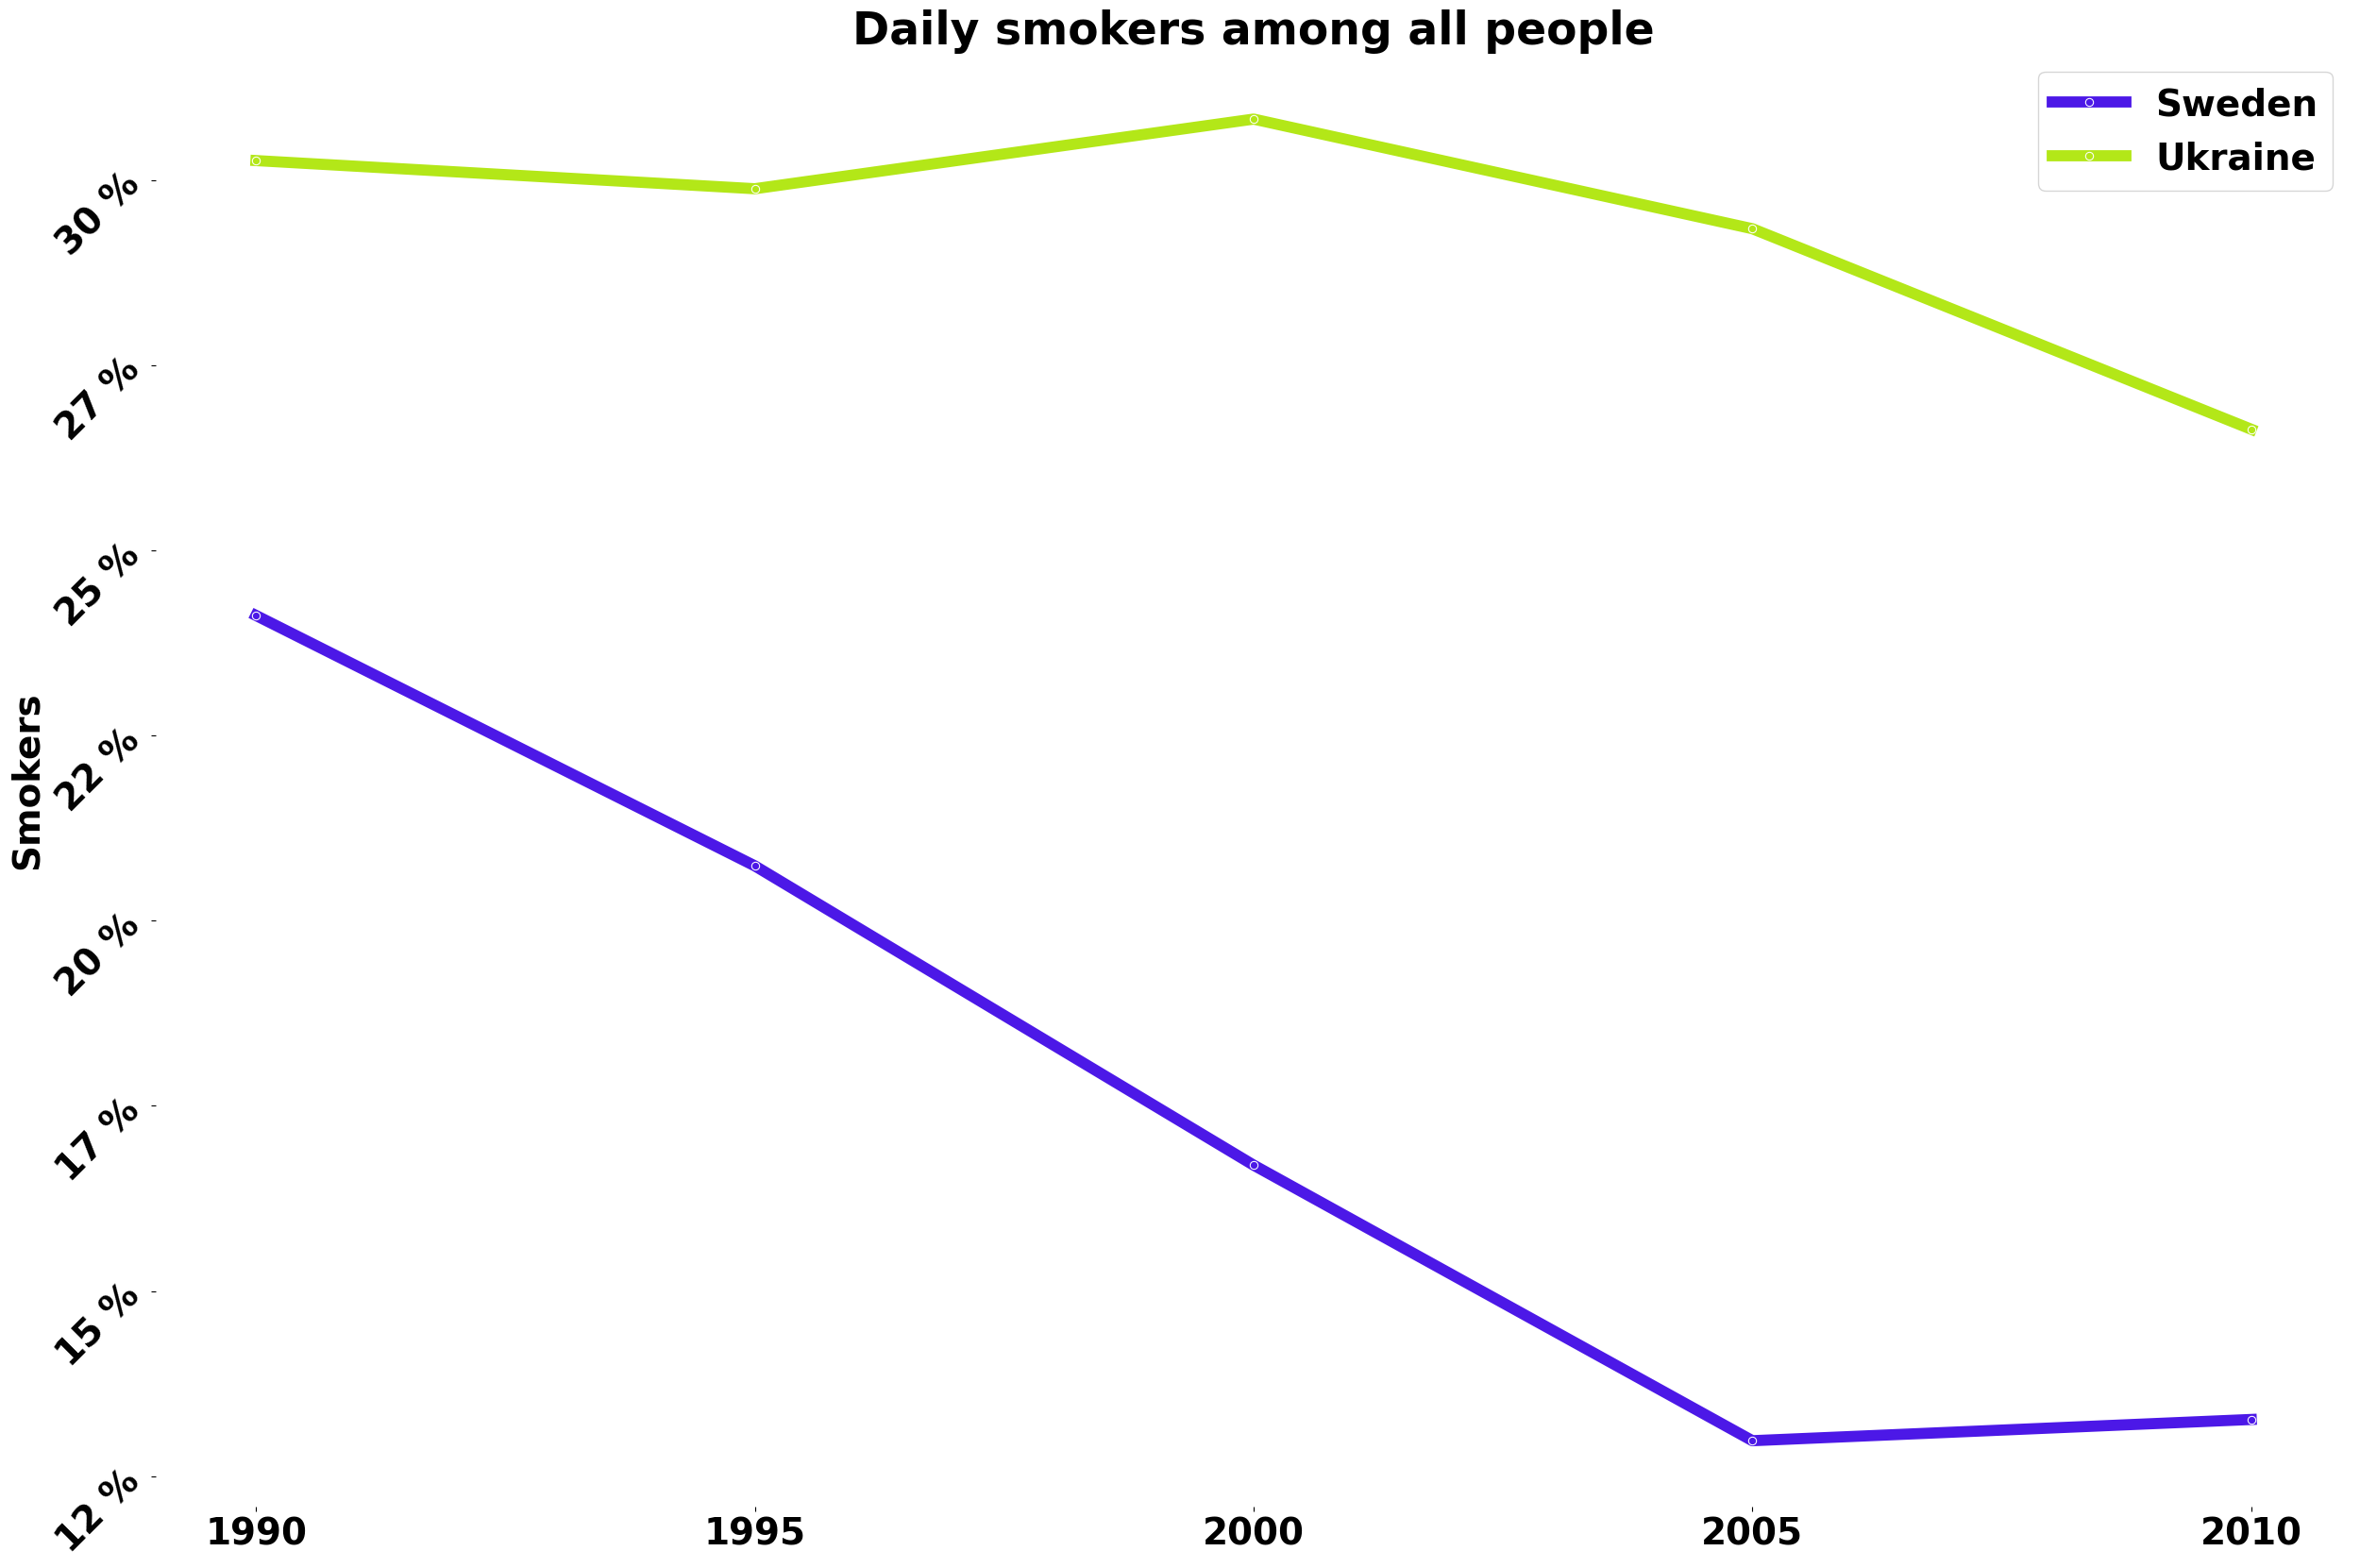

In [15]:
plt.rcParams.update({'font.size': 28})
y = "#B7C33C"
g = "#999999"

fig, ax = plt.subplots(figsize=(30, 20))  # Используем одну рамку для обоих линий

# Преобразование периодов в строковый формат
sweden_x_labels = [str(year) for year in sweden_daily_smoking_agg.index]
ukraine_x_labels = [str(year) for year in ukraine_daily_smoking_agg.index]

sns.lineplot(data=sweden_daily_smoking_agg, x=sweden_x_labels, y=sweden_daily_smoking_agg["Daily smoking pct"], ax=ax, marker='o', linewidth=8.5, color='#4C18E7', label="Sweden")
sns.lineplot(data=ukraine_daily_smoking_agg, x=ukraine_x_labels, y=ukraine_daily_smoking_agg["Daily smoking pct"], ax=ax, marker='o', linewidth=8.5, color='#B3E718', label="Ukraine")

ax.set_title("Daily smokers among all people", fontsize=34)
ax.set_xlabel('')
ax.set_ylabel('Smokers')
ax.tick_params(axis='y', rotation=45)  # Поворачиваем метки по оси y на 45 градусов
y_vals = ax.get_yticks()
ax.set_yticklabels([f'{int(y)} %' for y in y_vals])
sns.despine(top=True, bottom=True, left=True)
plt.savefig("daily_smokers.png", bbox_inches="tight")
plt.legend(fontsize=28)  # Добавляем легенду
plt.show()


# Air Pollution EDA

In [16]:
ukraine_air_pollution = air_pollution[air_pollution["Entity"] == "Ukraine"]
sweden_air_pollution = air_pollution[air_pollution["Entity"] == "Sweden"]

In [17]:
ukraine_air_pollution = ukraine_air_pollution.set_index(pd.DatetimeIndex(pd.to_datetime(ukraine_air_pollution["Year"], format="%Y")).to_period("Y")).drop(columns=["Entity", "Code", "Year"])

In [18]:
ukraine_air_pollution = ukraine_air_pollution.rename(columns={"Share of total deaths that are from all causes attributed to air pollution, in both sexes aged age-standardized": "Total deaths that attributed to air pollution pct"})

In [19]:
sweden_air_pollution = sweden_air_pollution.set_index(pd.DatetimeIndex(pd.to_datetime(sweden_air_pollution["Year"], format="%Y")).to_period("Y")).drop(columns=["Entity", "Code", "Year"])

In [20]:
sweden_air_pollution = sweden_air_pollution.rename(columns={"Share of total deaths that are from all causes attributed to air pollution, in both sexes aged age-standardized": "Total deaths that attributed to air pollution pct"})

<Axes: xlabel='Year'>

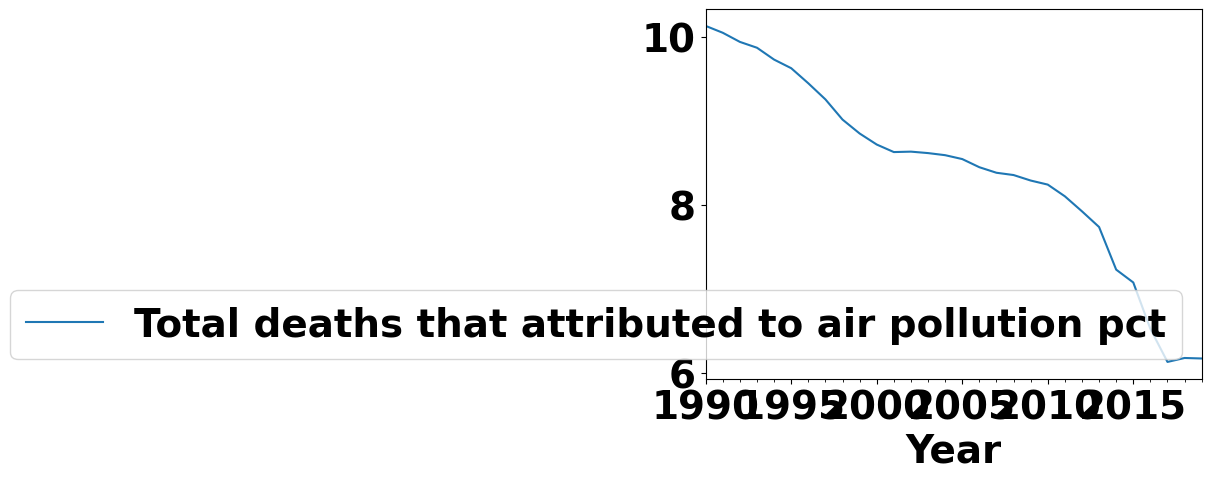

In [21]:
ukraine_air_pollution.plot()

<Axes: xlabel='Year'>

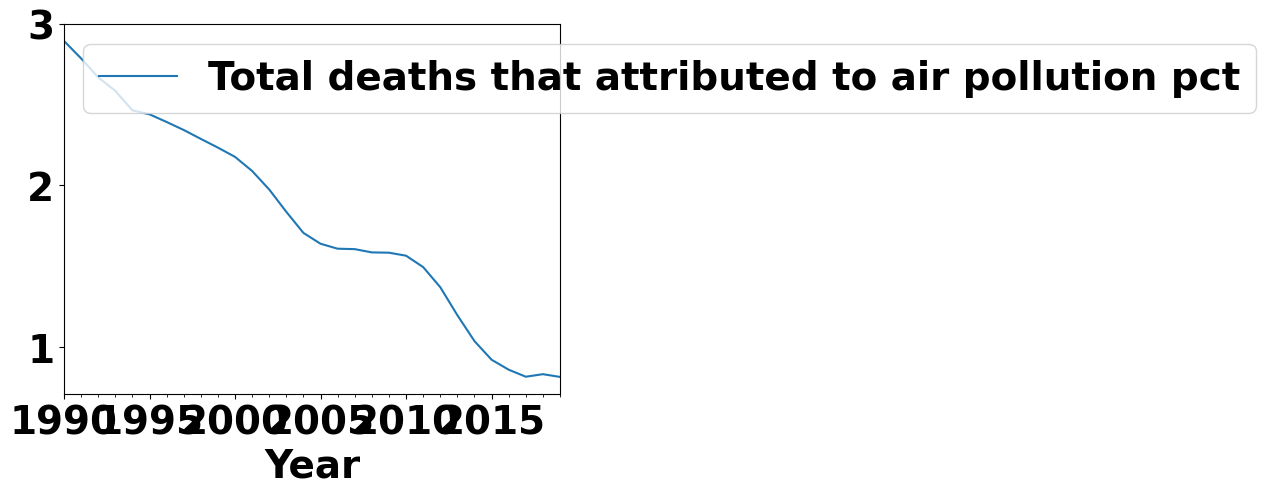

In [22]:
sweden_air_pollution.plot()

In [23]:
sweden_air_pollution

,Total deaths that attributed to air pollution pct
Year,
1990,2.895931
1991,2.787467
1992,2.669834
1993,2.586420
1994,2.465302
1995,2.440746
1996,2.393303
1997,2.343602
1998,2.288437


In [24]:
sweden_air_pollution["Total deaths that attributed to air pollution pct"].values

array([2.895931  , 2.787467  , 2.6698344 , 2.58642   , 2.465302  ,
       2.4407463 , 2.3933032 , 2.343602  , 2.2884371 , 2.2343323 ,
       2.176797  , 2.0894186 , 1.9744374 , 1.8358688 , 1.7053198 ,
       1.6382595 , 1.6075753 , 1.6049063 , 1.5846107 , 1.5828195 ,
       1.5641772 , 1.4934874 , 1.3688635 , 1.1951123 , 1.0345597 ,
       0.9191235 , 0.8573039 , 0.8137726 , 0.8295296 , 0.81253004])

In [25]:
sweden_air_pollution.index

PeriodIndex(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
             '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
             '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
             '2014', '2015', '2016', '2017', '2018', '2019'],
            dtype='period[A-DEC]', name='Year')

In [26]:
years = sweden_air_pollution.index.year

sweden_air_pollution['Years_5'] = (years // 5) * 5

sweden_aggregated = sweden_air_pollution.groupby('Years_5').mean()  

ukraine_air_pollution['Years_5'] = (years // 5) * 5
ukraine_aggregated = ukraine_air_pollution.groupby('Years_5').mean()   

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

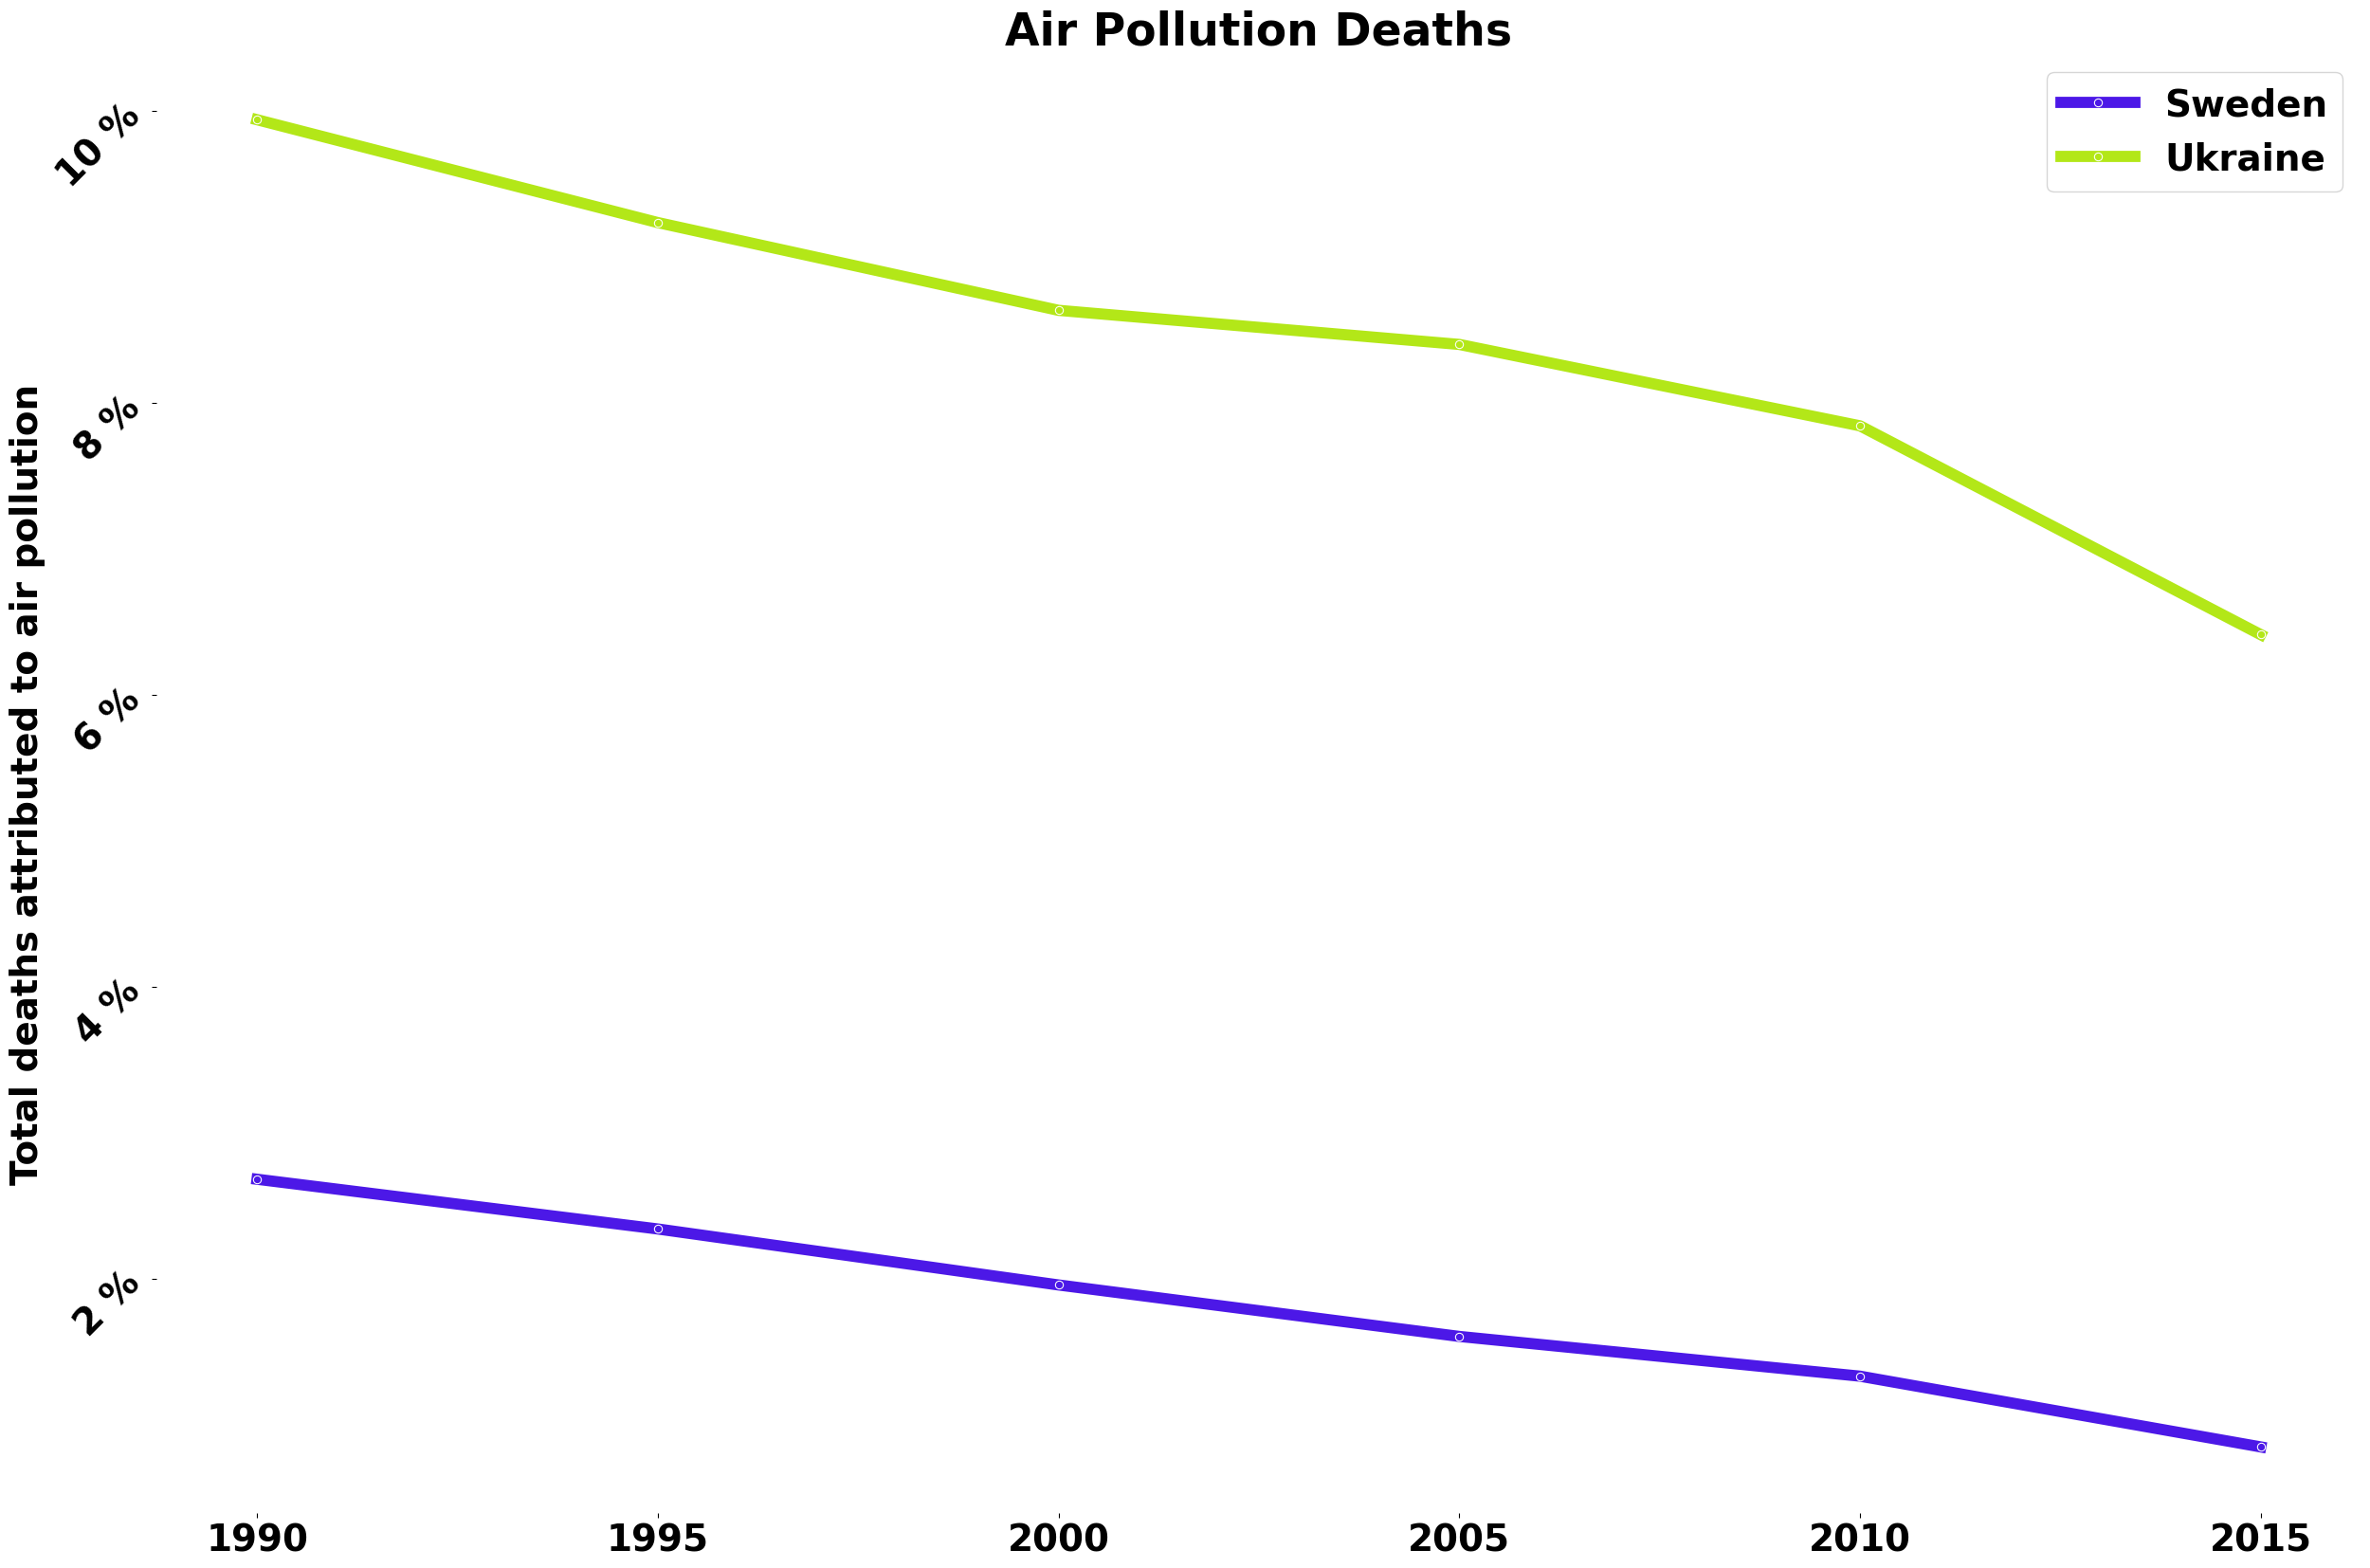

In [27]:
plt.rcParams.update({'font.size': 28})
y = "#B7C33C"
g = "#999999"

fig, ax = plt.subplots(figsize=(30, 20))  # Используем одну рамку для обоих линий

sns.lineplot(data=sweden_aggregated, x=sweden_aggregated.index, y=sweden_aggregated["Total deaths that attributed to air pollution pct"], ax=ax, marker='o', linewidth=8.5, color='#4C18E7', label="Sweden")
sns.lineplot(data=ukraine_aggregated, x=ukraine_aggregated.index, y=ukraine_aggregated["Total deaths that attributed to air pollution pct"], ax=ax, marker='o', linewidth=8.5, color='#B3E718', label="Ukraine")

ax.set_title("Air Pollution Deaths", fontsize=34)
ax.set_xlabel('')
ax.set_ylabel('Total deaths attributed to air pollution')
ax.tick_params(axis='y', rotation=45)  # Поворачиваем метки по оси y на 45 градусов
y_vals = ax.get_yticks()
ax.set_yticklabels([f'{int(y)} %' for y in y_vals])
sns.despine(top=True, bottom=True, left=True)
plt.savefig("air_pollution_deaths.png", bbox_inches="tight")
plt.legend(fontsize=28)  # Добавляем легенду
plt.show()


# Ukraine Air Pollution / Chronic Respiratory Diseases Correlation

In [28]:
cause_of_deaths_df = pd.read_csv("cause_of_deaths.csv")
ukraine = cause_of_deaths_df[cause_of_deaths_df["Country/Territory"] == "Ukraine"].copy()
ukraine.drop(columns=["Code", "Country/Territory", "Malaria"], inplace=True)
ukraine = ukraine.set_index(pd.DatetimeIndex(pd.to_datetime(ukraine["Year"], format="%Y")).to_period("Y")).drop(columns="Year")
chronic_dis_ukraine = ukraine["Chronic Respiratory Diseases"]

In [29]:
merged_pollution_chonic_dis_ukraine = pd.merge(ukraine_air_pollution, chronic_dis_ukraine, left_index=True, right_index=True)

In [30]:
ukraine_air_pollution

,Total deaths that attributed to air pollution pct,Years_5
Year,,
1990,10.128935,1990
1991,10.047197,1990
1992,9.938683,1990
1993,9.868939,1990
1994,9.727776,1990
1995,9.625406,1995
1996,9.445669,1995
1997,9.254154,1995
1998,9.013613,1995


In [31]:
merged_pollution_chonic_dis_ukraine

,Total deaths that attributed to air pollution pct,Years_5,Chronic Respiratory Diseases
Year,,,
1990,10.128935,1990,33452
1991,10.047197,1990,34769
1992,9.938683,1990,35844
1993,9.868939,1990,36708
1994,9.727776,1990,37179
1995,9.625406,1995,38011
1996,9.445669,1995,36111
1997,9.254154,1995,33530
1998,9.013613,1995,30292


In [32]:
pearsonr(merged_pollution_chonic_dis_ukraine["Total deaths that attributed to air pollution pct"], merged_pollution_chonic_dis_ukraine["Chronic Respiratory Diseases"])

PearsonRResult(statistic=0.873071695541525, pvalue=3.123226230734305e-10)

In [33]:
merged_pollution_chonic_dis_ukraine

,Total deaths that attributed to air pollution pct,Years_5,Chronic Respiratory Diseases
Year,,,
1990,10.128935,1990,33452
1991,10.047197,1990,34769
1992,9.938683,1990,35844
1993,9.868939,1990,36708
1994,9.727776,1990,37179
1995,9.625406,1995,38011
1996,9.445669,1995,36111
1997,9.254154,1995,33530
1998,9.013613,1995,30292


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

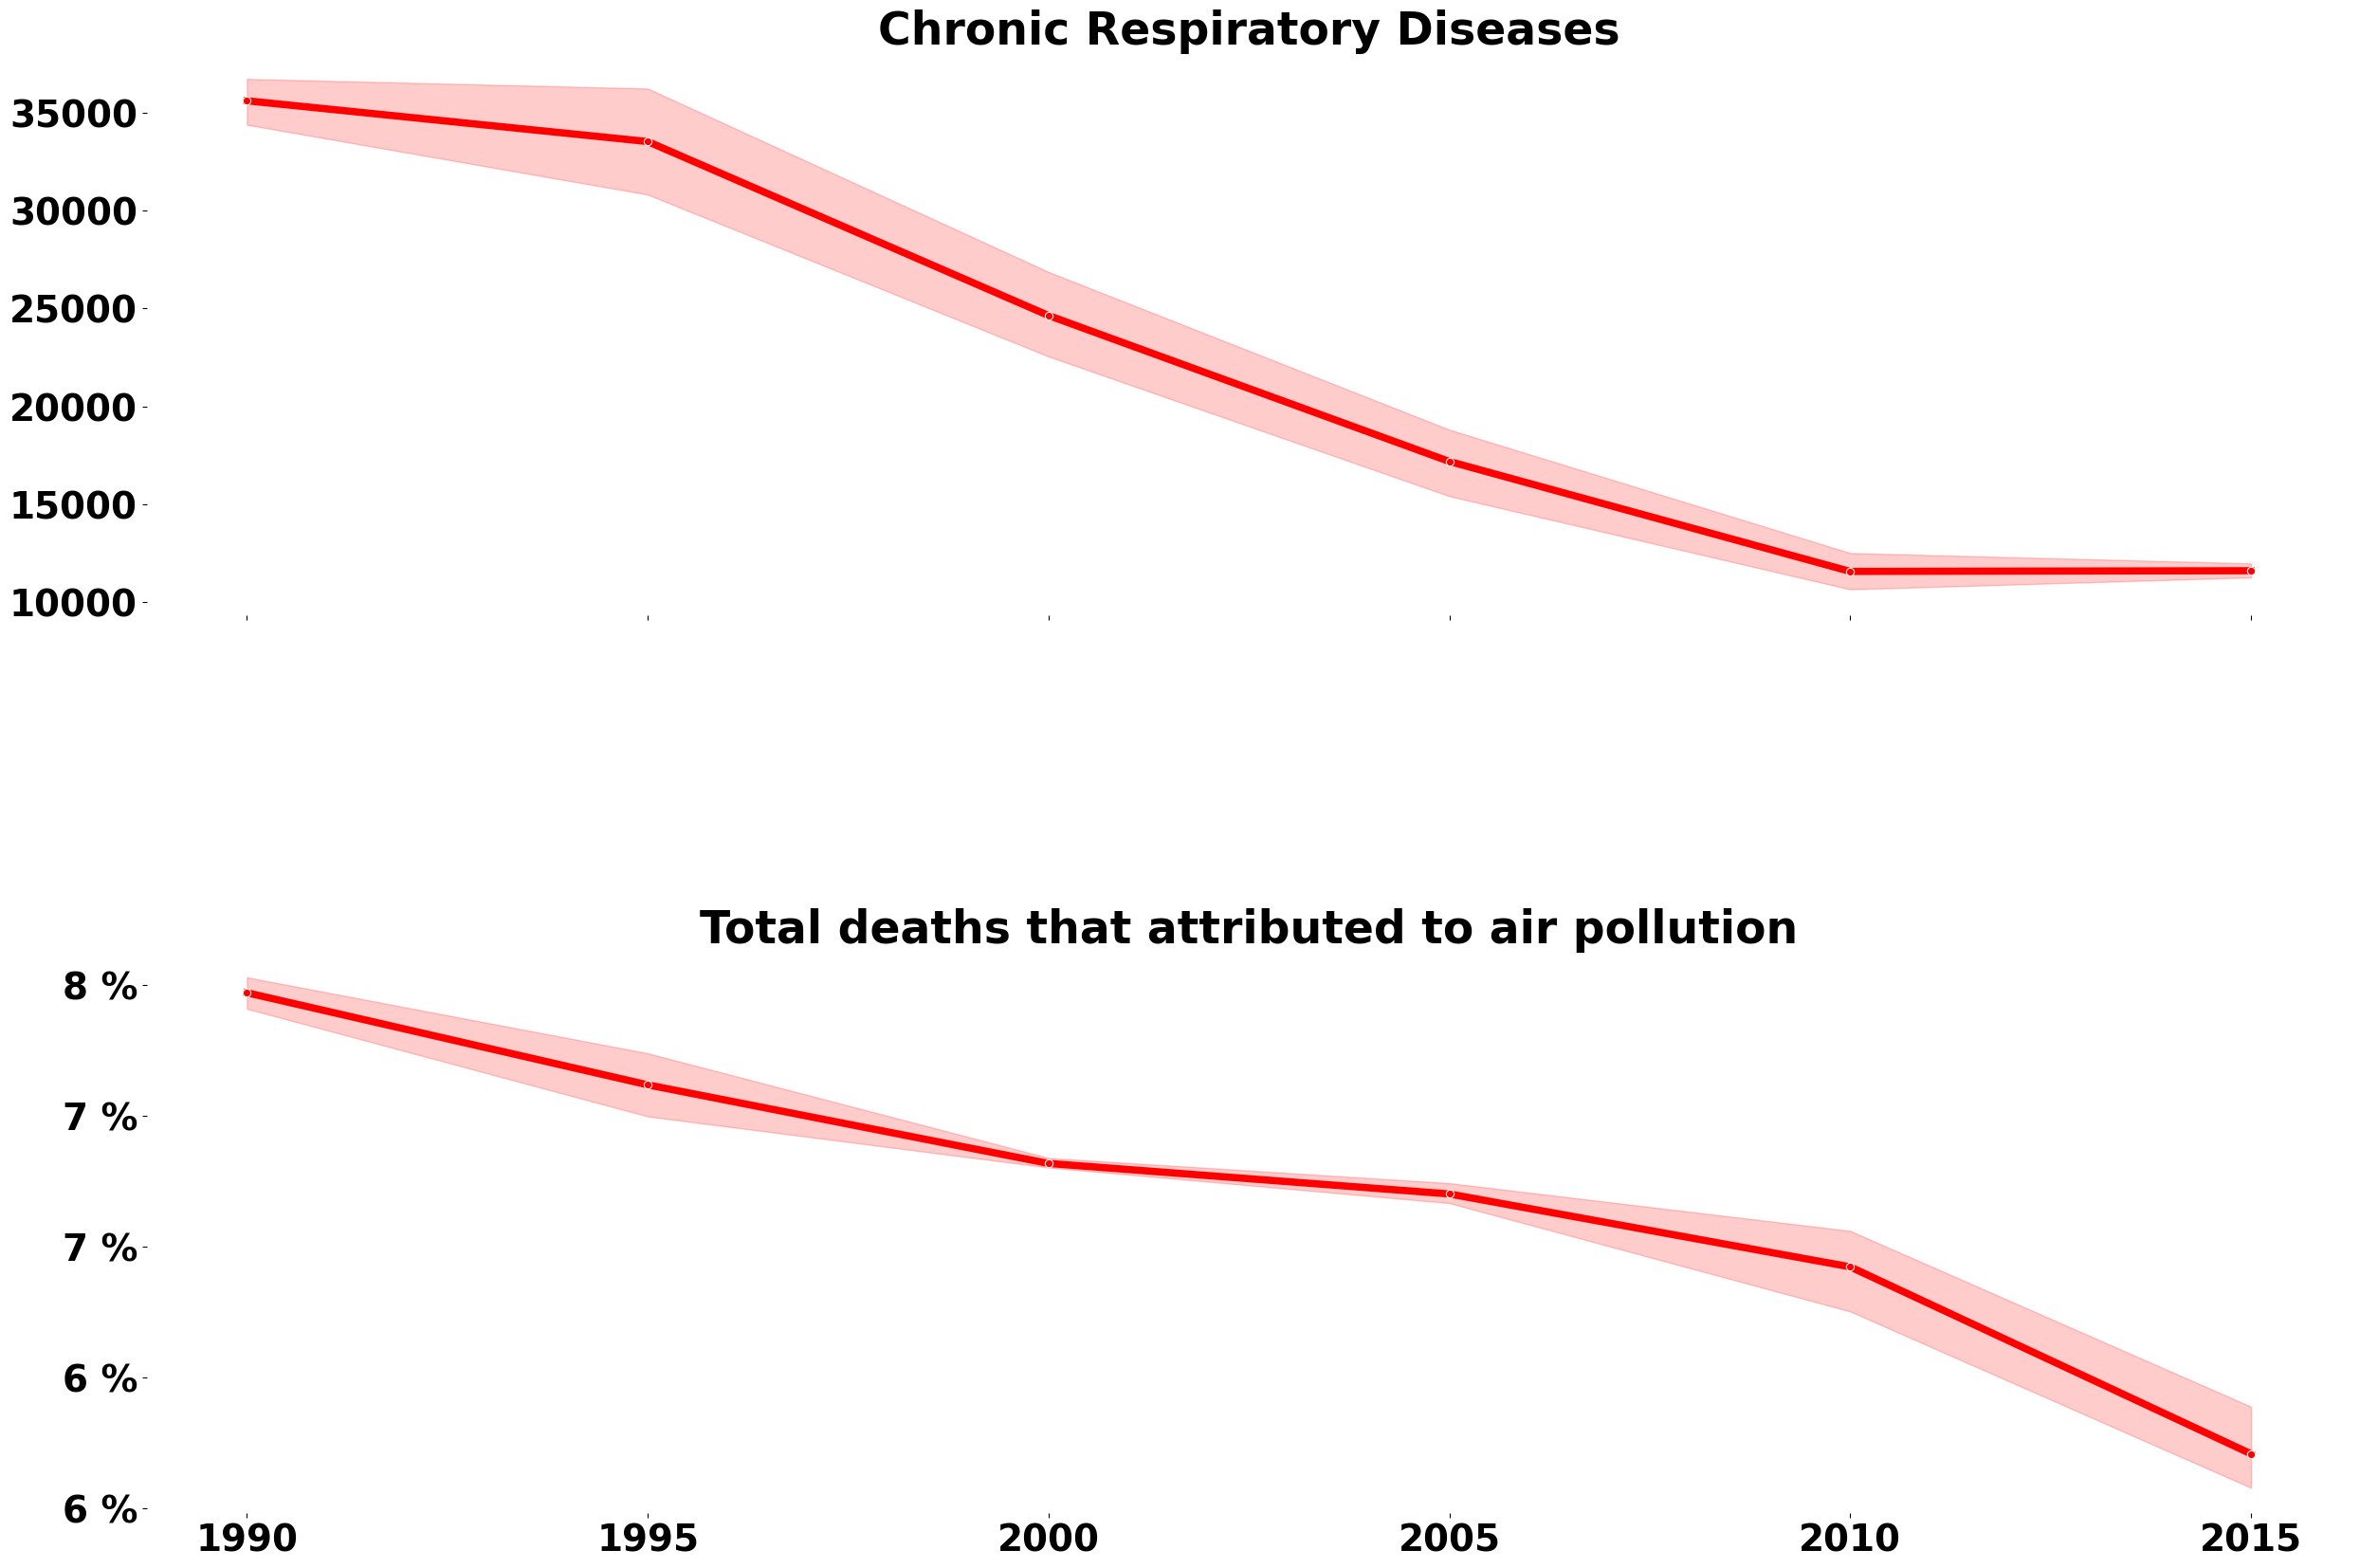

In [34]:
plt.rcParams.update({'font.size': 28})
y = "#B7C33C"
g = "#999999"

fig, ax = plt.subplots(2, figsize=(30, 20), sharex=True)

sns.lineplot(data=merged_pollution_chonic_dis_ukraine, x=merged_pollution_chonic_dis_ukraine["Years_5"], y=merged_pollution_chonic_dis_ukraine["Chronic Respiratory Diseases"], ax=ax[0], marker='o', linewidth=5.5, color='red')
ax[0].set_title("Chronic Respiratory Diseases", fontsize=34)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
#ax[0].tick_params(axis='y', rotation=45)  # Поворачиваем метки по оси y на 45 градусов

sns.lineplot(data=merged_pollution_chonic_dis_ukraine, x=merged_pollution_chonic_dis_ukraine["Years_5"], y=merged_pollution_chonic_dis_ukraine["Total deaths that attributed to air pollution pct"], ax=ax[1], marker='o', linewidth=5.5, color='red')
ax[1].set_title("Total deaths that attributed to air pollution", fontsize=34)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
#ax[1].tick_params(axis='y', rotation=45)  # Поворачиваем метки по оси y на 45 градусов
y_vals = ax[1].get_yticks()
ax[1].set_yticklabels([f'{int(y)} %' for y in y_vals])

sns.despine(top=True, bottom=True, left=True)
plt.subplots_adjust(hspace=0.6)
plt.savefig("air_respiratory.png", bbox_inches="tight")
plt.show()


In [35]:
alcohol_sweden

,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
Year,
2000,8.53
2005,8.64
2010,9.49
2015,9.13
2018,8.93


In [36]:
alcohol_ukraine

,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
Year,
2000,12.46
2005,12.01
2010,13.57
2015,10.16
2018,8.32


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


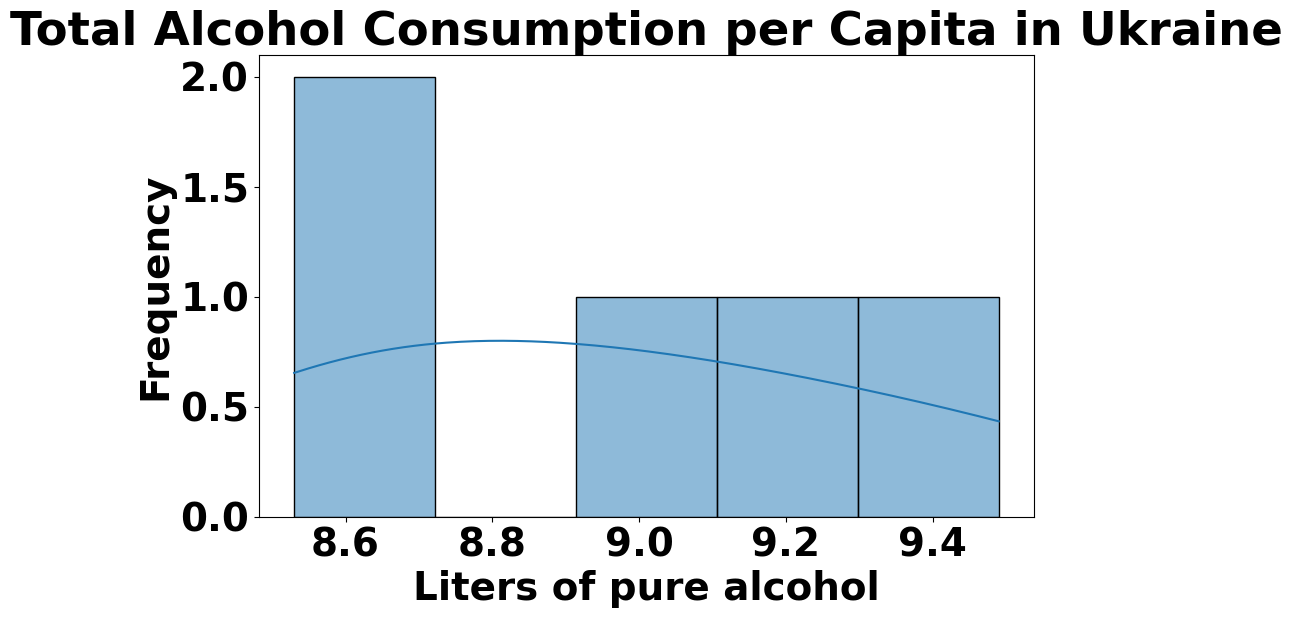

In [37]:
# Построение гистограммы потребления алкоголя для Украины
plt.figure(figsize=(10, 6))
sns.histplot(data=alcohol_sweden['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'], bins=5, kde=True)
plt.title('Total Alcohol Consumption per Capita in Ukraine')
plt.xlabel('Liters of pure alcohol')
plt.ylabel('Frequency')
plt.show()


In [38]:
df = pd.read_csv("health-expenditure-government-expenditure.csv")

In [39]:
df

,Entity,Code,Year,Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%)
0,Afghanistan,AFG,2002,1.21
1,Afghanistan,AFG,2003,5.46
2,Afghanistan,AFG,2004,3.60
3,Afghanistan,AFG,2005,3.37
4,Afghanistan,AFG,2006,2.72
...,...,...,...,...
4284,Zimbabwe,ZWE,2017,5.56
4285,Zimbabwe,ZWE,2018,7.86
4286,Zimbabwe,ZWE,2019,3.94
4287,Zimbabwe,ZWE,2020,5.21


In [40]:
df_sweden = df[df["Entity"] == "Sweden"].copy()
df_sweden = df_sweden[df_sweden["Year"] >= 1990]
df_sweden = df_sweden.set_index(pd.DatetimeIndex(pd.to_datetime(df_sweden["Year"], format="%Y")).to_period("Y")).drop(columns=["Year", "Code", "Entity"])

In [41]:
df_sweden

,Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%)
Year,
2000,11.67
2001,12.36
2002,12.64
2003,12.85
2004,12.81
2005,12.83
2006,12.98
2007,13.38
2008,13.54


In [51]:
df_ukraine = df[df["Entity"] == "Ukraine"].copy()
df_ukraine = df_ukraine[df_ukraine["Year"] >= 1990]
df_ukraine = df_ukraine.set_index(pd.DatetimeIndex(pd.to_datetime(df_ukraine["Year"], format="%Y")).to_period("Y")).drop(columns=["Year", "Code", "Entity"])

In [52]:
df_ukraine

,Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%)
Year,
2000,7.08
2001,7.63
2002,8.11
2003,9.39
2004,8.18
2005,8.43
2006,8.70
2007,8.16
2008,6.78


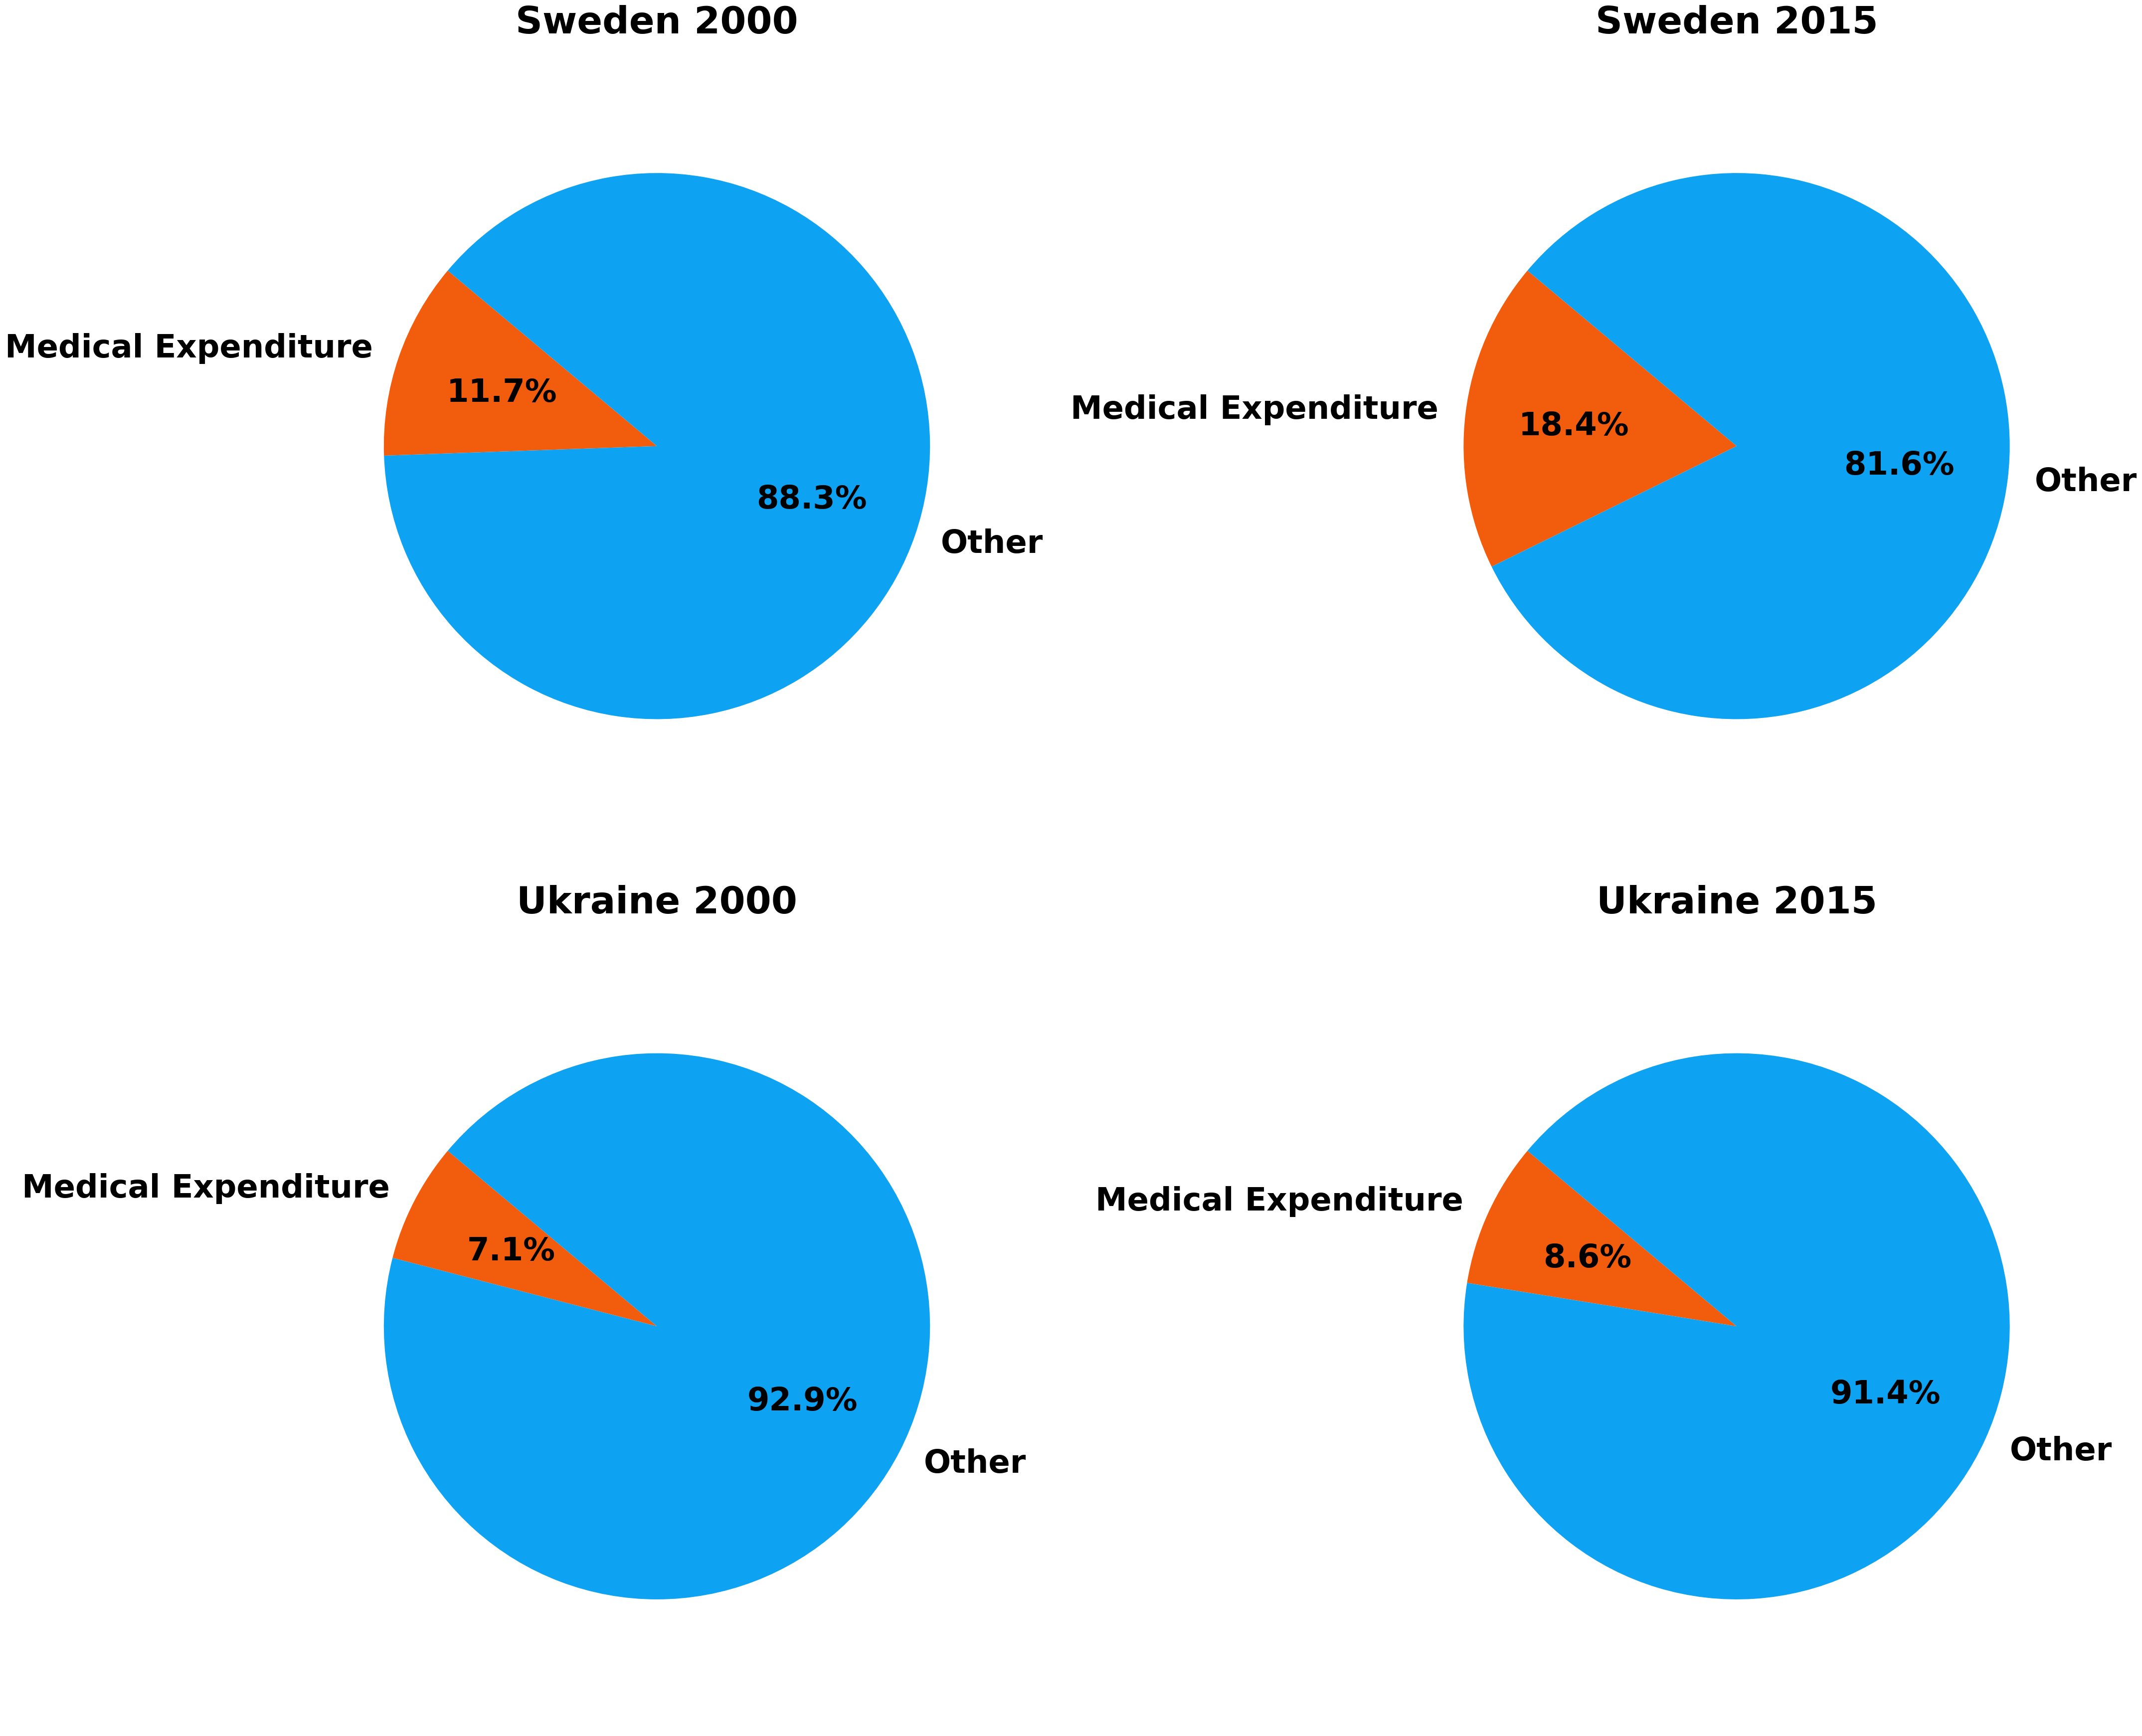

In [81]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 46.0

# Данные для круговой диаграммы 1
labels_2000_sweden = ['Medical Expenditure', 'Other']
sizes_2000_sweden = [11.67, 100 - 11.67]

# Данные для круговой диаграммы 2
labels_2015_sweden = ['Medical Expenditure', 'Other']
sizes_2015_sweden = [18.39, 100 - 18.39]

# Данные для круговой диаграммы 3
labels_2000_ukraine = ['Medical Expenditure', 'Other']
sizes_2000_ukraine = [7.08, 100 - 7.08]

# Данные для круговой диаграммы 4
labels_2015_ukraine = ['Medical Expenditure', 'Other']
sizes_2015_ukraine = [8.57, 100 - 8.57]

# Цвета для сегментов
colors = ['#F25D0D', '#0DA2F2']

# Создание сетки графиков 2x2 с увеличенным размером шрифта
fig, axs = plt.subplots(2, 2, figsize=(44, 36))

# Создание круговых диаграмм для Швеции 2000 года
axs[0, 0].pie(sizes_2000_sweden, labels=labels_2000_sweden, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Sweden 2000', fontsize=54)
axs[0, 0].axis('equal')

# Создание круговых диаграмм для Швеции 2015 года
axs[0, 1].pie(sizes_2015_sweden, labels=labels_2015_sweden, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Sweden 2015', fontsize=54)
axs[0, 1].axis('equal')

# Создание круговых диаграмм для Украины 2000 года
axs[1, 0].pie(sizes_2000_ukraine, labels=labels_2000_ukraine, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Ukraine 2000', fontsize=54)
axs[1, 0].axis('equal')

# Создание круговых диаграмм для Украины 2015 года
axs[1, 1].pie(sizes_2015_ukraine, labels=labels_2015_ukraine, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Ukraine 2015', fontsize=54)
axs[1, 1].axis('equal')

plt.tight_layout()
plt.savefig("medical_expenditure.png")
plt.show()
